## Import numpy, pandas, pyplot, and seaborn
set the seaborn style

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

sns.set()

In [3]:
# full df for internal use
avo_df = pd.read_csv('avocado.csv')
avo_df["Date"] = pd.to_datetime(avo_df.Date)

## read in data

You will be using a new version of the avocado dataset. This version contains information on conventional avocados only. It also has a new column, which indicates whether the row if from a "summer month" (defined as April through September.


In [27]:
conv_avo_df = pd.read_csv('conventional_avo.csv')

In [28]:
# remind ourselves of the content of this DF
conv_avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9126 entries, 0 to 9125
Data columns (total 15 columns):
Unnamed:_0      9126 non-null int64
Date            9126 non-null object
AveragePrice    9126 non-null float64
Total_Volume    9126 non-null float64
4046            9126 non-null float64
4225            9126 non-null float64
4770            9126 non-null float64
Total_Bags      9126 non-null float64
Small_Bags      9126 non-null float64
Large_Bags      9126 non-null float64
XLarge_Bags     9126 non-null float64
type            9126 non-null object
year            9126 non-null int64
region          9126 non-null object
summer          9126 non-null bool
dtypes: bool(1), float64(9), int64(2), object(3)
memory usage: 1007.2+ KB


## convert Date column to datetime type and sort by Data

In [6]:
conv_avo_df["Date"] = pd.to_datetime(conv_avo_df["Date"])
conv_avo_df.sort_values("Date", inplace=True)

In [7]:
sorted(conv_avo_df.region.unique())

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

# Guiding questions

Is there a significant difference in the average price of avocados during summer months (defined as April 1st through Sept 30) versus winter months? Does it make a difference if you are in a colder climate versus a warmer climate? 

Steps: Filter the DataFrame down so that you have three new DataFrames, one for each of the following regions


1) Total US 

2) San Diego 

3) Boston 


In [8]:
conv_df_total_us = conv_avo_df.loc[conv_avo_df["region"]=="TotalUS"]
conv_df_sd = conv_avo_df.loc[conv_avo_df["region"]=="SanDiego"]
conv_df_bos = conv_avo_df.loc[conv_avo_df["region"]=="Boston"]

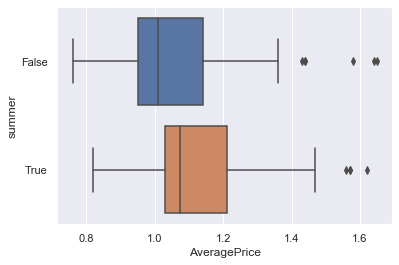

In [9]:
# create boxplots with seaborn to compare the Average Price distribution for summer and winter months
sns.boxplot(data=conv_df_total_us, x="AveragePrice", y="summer", orient="h")

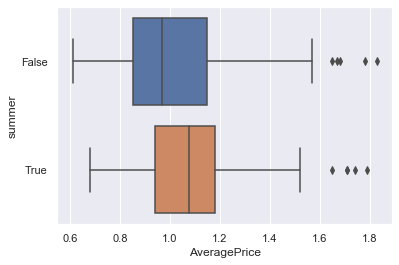

In [10]:
sns.boxplot(data=conv_df_sd, x="AveragePrice", y="summer", orient="h")

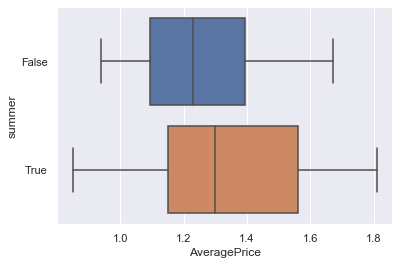

In [11]:
sns.boxplot(data=conv_df_bos, x="AveragePrice", y="summer", orient="h")

In [12]:
def split_series(df):
    summer_srs = df.loc[df["summer"]==True]["AveragePrice"]
    winter_srs = df.loc[df["summer"]==False]["AveragePrice"]
    return summer_srs, winter_srs

In [13]:
def print_diff(summer_srs, winter_srs):
    summer_mean = summer_srs.mean()
    winter_mean = winter_srs.mean()
    print(f"Summer Mean: {summer_mean}")
    print(f"Winter Mean: {winter_mean}")
    print(f"Difference in Means: {summer_mean - winter_mean}")
    print(f"Percent Difference: {100*(summer_mean - winter_mean)/winter_mean}%")

In [14]:
# Total US
summer_total_us, winter_total_us = split_series(conv_df_total_us)
print_diff(summer_total_us, winter_total_us)


Summer Mean: 1.1238461538461535
Winter Mean: 1.0647252747252747
Difference in Means: 0.05912087912087882
Percent Difference: 5.552688615956211%


In [15]:
#t-test SanDiego
summer_sd, winter_sd = split_series(conv_df_sd)
print_diff(summer_sd, winter_sd)


Summer Mean: 1.104358974358974
Winter Mean: 1.0247252747252746
Difference in Means: 0.07963369963369926
Percent Difference: 7.7712243074173015%


In [16]:
#t-test Boston
summer_bos, winter_bos = split_series(conv_df_bos)
print_diff(summer_bos, winter_bos)

Summer Mean: 1.3578205128205127
Winter Mean: 1.258571428571429
Difference in Means: 0.09924908424908385
Percent Difference: 7.885852323990768%


In [17]:
ttest_ind(summer_total_us, winter_total_us, usevar='unequal')

(2.2354802992258693, 0.026725109099811205, 165.29009272222456)

In [20]:
ttest_ind(summer_sd, winter_sd, usevar='unequal')

(2.109444157552642, 0.036405909273276166, 166.01668137546255)

In [19]:
ttest_ind(summer_bos, winter_bos, usevar='unequal')

(2.9603981924463234, 0.003583247264468476, 146.94891516001866)

In [19]:
conv_df_bos.AveragePrice.max()

1.81

In [20]:
# compare the averages
summer_prices = conv_df_total_us.loc[conv_df_total_us["summer"]==True]["AveragePrice"]
winter_prices = conv_df_total_us.loc[conv_df_total_us["summer"]==False]["AveragePrice"]
print(summer_prices.mean())
print(winter_prices.mean())


1.1238461538461535
1.0647252747252747


In [23]:
# we can see that there is a difference of about 6 cents. 
# Is this difference significant or could it be the result of chance?

# total us prices --> below 0.05
t_stat, p_val, df = ttest_ind(summer_prices, winter_prices)
t_stat, p_val

(2.2262510139997027, 0.027335305807168114)

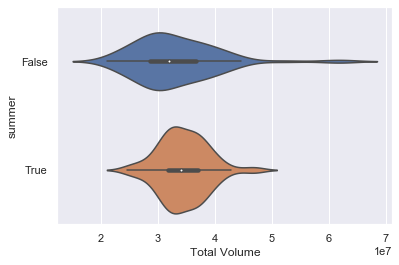

In [24]:
# what if we did it for volume instead? 
sns.violinplot(data=conv_df_total_us, x="Total Volume", y="summer", orient="h")


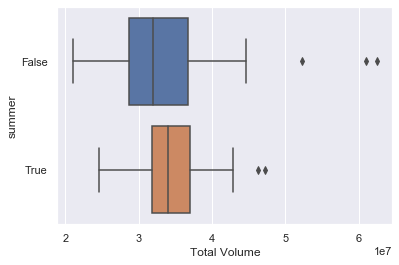

In [25]:
# we could also investigate whether this changes if we remove outliers. We know that there is a huge 
# spike during Superbowl week, which is in the winter and is what is giving the summer = False distribution 
# its long tail
sns.boxplot(data=conv_df_total_us, x="Total Volume", y="summer", orient="h")

In [27]:
summer_volumes = conv_df_total_us.loc[conv_df_total_us["summer"]==True]["Total Volume"]
winter_volumes = conv_df_total_us.loc[conv_df_total_us["summer"]==False]["Total Volume"]
print(summer_volumes.mean())
print(winter_volumes.mean())

34458526.5297436
33114906.78065935


In [31]:
# total us volume --> greater than 0.05
t_stat, p_val, df = ttest_ind(summer_volumes, winter_volumes, usevar="unequal")
t_stat, p_val

(1.4832818217410433, 0.14012368697375702)

In [29]:
# Let's check both volume and average price for the SD and BOS data


## SD

In [32]:
summer_prices_sd = conv_df_sd.loc[conv_df_sd["summer"]==True]["AveragePrice"]
winter_prices_sd = conv_df_sd.loc[conv_df_sd["summer"]==False]["AveragePrice"]

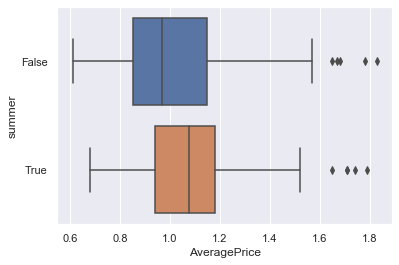

In [33]:
sns.boxplot(data=conv_df_sd, x="AveragePrice", y="summer", orient="h")

In [35]:
# SD price --> below 0.05
t_stat, p_val, df = ttest_ind(summer_prices_sd, winter_prices_sd)
t_stat, p_val

(2.096744980268762, 0.037522820548732676)

In [36]:
summer_volume_sd = conv_df_sd.loc[conv_df_sd["summer"]==True]["Total Volume"]
winter_volume_sd = conv_df_sd.loc[conv_df_sd["summer"]==False]["Total Volume"]

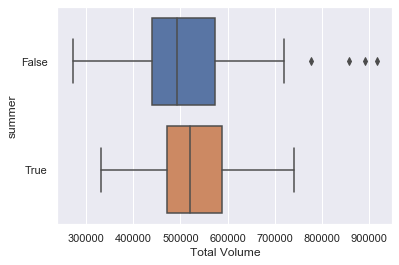

In [37]:
sns.boxplot(data=conv_df_sd, x="Total Volume", y="summer", orient="h")

In [38]:
# SD volume --> Much greater than 0.05
t_stat, p_val, df = ttest_ind(summer_volume_sd, winter_volume_sd)
t_stat, p_val

(0.9684679921020074, 0.3342111900895153)

## BOS


In [40]:
summer_prices_bos = conv_df_bos.loc[conv_df_bos["summer"]==True]["AveragePrice"]
winter_prices_bos = conv_df_bos.loc[conv_df_bos["summer"]==False]["AveragePrice"]

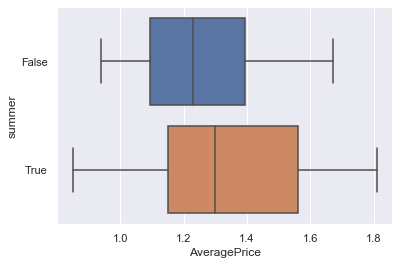

In [41]:
sns.boxplot(data=conv_df_bos, x="AveragePrice", y="summer", orient="h")

In [42]:
# Boston prices --> well under 0.05
t_stat, p_val, df = ttest_ind(summer_prices_bos, winter_prices_bos)
t_stat, p_val

(3.0108614010001533, 0.0030097927903653854)

In [43]:
summer_volume_bos = conv_df_bos.loc[conv_df_bos["summer"]==True]["Total Volume"]
winter_volume_bos = conv_df_bos.loc[conv_df_bos["summer"]==False]["Total Volume"]

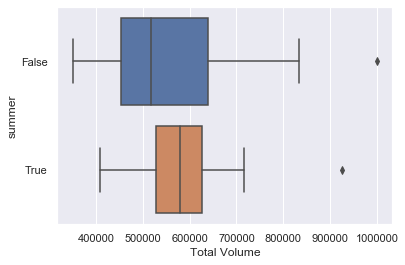

In [44]:
sns.boxplot(data=conv_df_bos, x="Total Volume", y="summer", orient="h")

In [46]:
# Boston volumes --> under 0.05
t_stat, p_val, df = ttest_ind(summer_volume_bos, winter_volume_bos)
t_stat, p_val

(2.024120246062124, 0.0445515014899775)

## Z test

To do a test of proportions, I will create another DF. 
City, Date, Vol_Conv, Vol_Org

Question: Do people in SF buy organic avocados at a greater rate than people in LA.

In [47]:
avo_sf_la_2016 = pd.read_csv('avo_sf_la_2016.csv')

In [48]:
avo_sf_la_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
Date              104 non-null object
region            104 non-null object
Total_Vol_org     104 non-null float64
Total_Vol_conv    104 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


In [49]:
# now, let's find the total volume sold for the entire year
avo_sf_la_sums = avo_sf_la_2016.groupby('region').agg({"Total_Vol_org":"sum", "Total_Vol_conv":"sum"})
avo_sf_la_sums

,Total_Vol_org,Total_Vol_conv
region,,
LosAngeles,4891080.72,1.582512e+08
SanFrancisco,1237904.51,4.029172e+07


In [50]:
# create a column for total volume across both columns
avo_sf_la_sums["Total_Volume_all"] = avo_sf_la_sums["Total_Vol_org"] + avo_sf_la_sums["Total_Vol_conv"]
avo_sf_la_sums

,Total_Vol_org,Total_Vol_conv,Total_Volume_all
region,,,
LosAngeles,4891080.72,1.582512e+08,1.631423e+08
SanFrancisco,1237904.51,4.029172e+07,4.152963e+07


In [53]:
avo_sf_la_sums["proportion_org"] = avo_sf_la_sums["Total_Vol_org"] / avo_sf_la_sums["Total_Volume_all"]
avo_sf_la_sums

,Total_Vol_org,Total_Vol_conv,Total_Volume_all,proportion_org
region,,,,
LosAngeles,4891080.72,1.582512e+08,1.631423e+08,0.029980
SanFrancisco,1237904.51,4.029172e+07,4.152963e+07,0.029808


In [54]:
organic_sales = avo_sf_la_sums["Total_Vol_org"]
total_sales = avo_sf_la_sums["Total_Volume_all"]

proportions_ztest(organic_sales, total_sales)

(5.830343262661636, 5.531347259060017e-09)